# Part3: 数据扩展
---

##### 针对打完标签的模版数据进行数据扩展，对某些标签对应的告警量比较少的使用算法进行补充，达到分布均匀作为训练数据
alarm_path

In [1]:
from data_enhancement import *

C:\Users\1\miniconda3\envs\_tf24\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 文件路径

In [2]:
# 告警数据路径
alarm_path = "D:\ZYL\label_class\Project\dataset\数据增强\东亚全量告警-未增强-修改后.csv"

# 抽取的告警模版路径（已人工打上标签）
temp_path = "D:\ZYL\label_class\Project\dataset\聚类模板\dy-temp775.csv"

# 最终输出告警数据保存路径
save_path = "./dataset/数据增强/东亚全量告警-已增强-修改后.csv"

## 1. 加载数据

In [8]:
# df = read_df(alarm_path, temp_path)
df = pd.read_csv(alarm_path)
save_config_map(df)
print("数据量为:", df.shape)

数据量为: (83653, 2)


## 2. 类别占比可视化

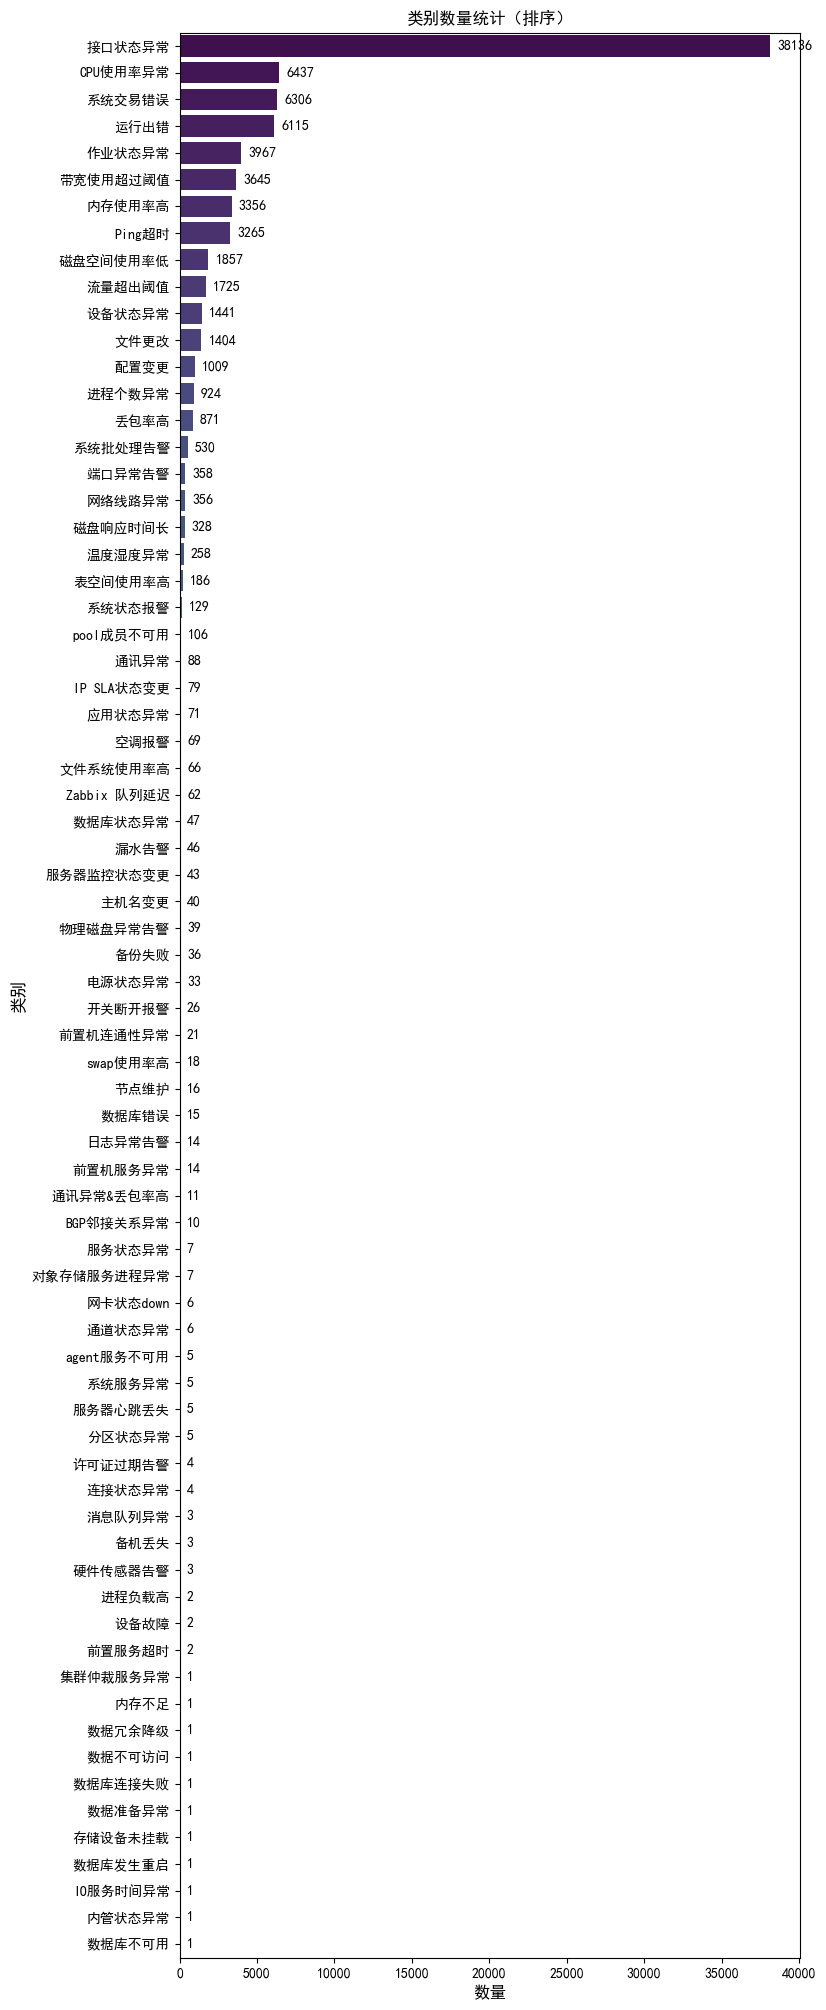

In [4]:
# 图的宽高
width, height = 8, 25
# df 的类别样本量保存为json
save_config(df)
seaborn_plot(width, height)

# -------------------------增强部分--------------------------
---

## 3. 随机下采样

In [9]:
# resample_count_threshold--采样阈值，当类别样本数量超过这一阈值，需要进行下采样
# 比如：label 1500个，阈值为1000，则在1500个里面随机采样1000条样本
resample_count_threshold = 800
df = main_lower(df, resample_count_threshold)

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 183.24it/s]

数据总量为:(83653, 2) 选择下采样的数据量为:(38136, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (45517, 2)
合并之后总数据量为: (46317, 2)
**************************************************
数据总量为:(46317, 2) 选择下采样的数据量为:(6437, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (39880, 2)
合并之后总数据量为: (40680, 2)
**************************************************
数据总量为:(40680, 2) 选择下采样的数据量为:(6306, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (34374, 2)
合并之后总数据量为: (35174, 2)
**************************************************
数据总量为:(35174, 2) 选择下采样的数据量为:(6115, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (29059, 2)
合并之后总数据量为: (29859, 2)
**************************************************
数据总量为:(29859, 2) 选择下采样的数据量为:(3967, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (25892, 2)
合并之后总数据量为: (26692, 2)
**************************************************
数据总量为:(26692, 2) 选择下采样的数据量为:(3645, 2)
下采样样本数量大小为: (800, 2)
去除下采样类别后数据量: (23047, 2)
合并之后总数据量为: (23847, 2)
**************************************************
数据总量为:(23847, 2) 选择下采样的数据量为:(3356, 2)
下采样样本数量大小为: (800, 2)
去除下采

In [6]:
# 用于生产验证数据
# df.to_csv("./dataset/推理输出/推理数据.csv", index=False)

## 4. 随机上采样、添加噪音、随机删除

In [10]:
label_dic = df.label.value_counts().to_dict()
df = main(df, dic=label_dic, resample_count_threshold=resample_count_threshold)
print(df.shape)

  0%|                                                                                           | 0/72 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\1\AppData\Local\Temp\jieba.cache


上采样前df.shape为: (15195, 2)
标签:系统批处理告警 的count为:530 上采样后df.shape为: (14665, 2)
--------------------------------------------------
增加数据量:----------------- 1060


Loading model cost 0.459 seconds.
Prefix dict has been built successfully.
 22%|██████████████████▏                                                               | 16/72 [00:00<00:02, 20.82it/s]

上采样前df.shape为: (14665, 2)
标签:端口异常告警 的count为:358 上采样后df.shape为: (14307, 2)
--------------------------------------------------
增加数据量:----------------- 1074
上采样前df.shape为: (14307, 2)
标签:网络线路异常 的count为:356 上采样后df.shape为: (13951, 2)
--------------------------------------------------
增加数据量:----------------- 1068
上采样前df.shape为: (13951, 2)
标签:磁盘响应时间长 的count为:328 上采样后df.shape为: (13623, 2)
--------------------------------------------------
增加数据量:----------------- 984


 26%|█████████████████████▋                                                            | 19/72 [00:01<00:06,  8.74it/s]

上采样前df.shape为: (13623, 2)
标签:温度湿度异常 的count为:258 上采样后df.shape为: (13365, 2)
--------------------------------------------------
增加数据量:----------------- 1032
上采样前df.shape为: (13365, 2)
标签:表空间使用率高 的count为:186 上采样后df.shape为: (13179, 2)
--------------------------------------------------
增加数据量:----------------- 930


 29%|███████████████████████▉                                                          | 21/72 [00:02<00:07,  6.39it/s]

上采样前df.shape为: (13179, 2)
标签:系统状态报警 的count为:129 上采样后df.shape为: (13050, 2)
--------------------------------------------------
增加数据量:----------------- 903


 31%|█████████████████████████                                                         | 22/72 [00:03<00:09,  5.16it/s]

上采样前df.shape为: (13050, 2)
标签:pool成员不可用 的count为:106 上采样后df.shape为: (12944, 2)
--------------------------------------------------
增加数据量:----------------- 848


 32%|██████████████████████████▏                                                       | 23/72 [00:03<00:10,  4.84it/s]

上采样前df.shape为: (12944, 2)
标签:通讯异常 的count为:88 上采样后df.shape为: (12856, 2)
--------------------------------------------------
增加数据量:----------------- 880


 33%|███████████████████████████▎                                                      | 24/72 [00:03<00:10,  4.55it/s]

上采样前df.shape为: (12856, 2)
标签:IP SLA状态变更 的count为:79 上采样后df.shape为: (12777, 2)
--------------------------------------------------
增加数据量:----------------- 869


 36%|█████████████████████████████▌                                                    | 26/72 [00:04<00:11,  4.07it/s]

上采样前df.shape为: (12777, 2)
标签:应用状态异常 的count为:71 上采样后df.shape为: (12706, 2)
--------------------------------------------------
增加数据量:----------------- 852


 38%|██████████████████████████████▊                                                   | 27/72 [00:04<00:12,  3.73it/s]

上采样前df.shape为: (12706, 2)
标签:空调报警 的count为:69 上采样后df.shape为: (12637, 2)
--------------------------------------------------
增加数据量:----------------- 828


 39%|███████████████████████████████▉                                                  | 28/72 [00:04<00:12,  3.47it/s]

上采样前df.shape为: (12637, 2)
标签:文件系统使用率高 的count为:66 上采样后df.shape为: (12571, 2)
--------------------------------------------------
增加数据量:----------------- 858


 40%|█████████████████████████████████                                                 | 29/72 [00:05<00:12,  3.37it/s]

上采样前df.shape为: (12571, 2)
标签:Zabbix 队列延迟 的count为:62 上采样后df.shape为: (12509, 2)
--------------------------------------------------
增加数据量:----------------- 806
上采样前df.shape为: (12509, 2)
标签:数据库状态异常 的count为:47 上采样后df.shape为: (12462, 2)
--------------------------------------------------
增加数据量:----------------- 846


 42%|██████████████████████████████████▏                                               | 30/72 [00:05<00:14,  2.90it/s]

上采样前df.shape为: (12462, 2)
标签:漏水告警 的count为:46 上采样后df.shape为: (12416, 2)
--------------------------------------------------
增加数据量:----------------- 828


 44%|████████████████████████████████████▍                                             | 32/72 [00:06<00:13,  2.89it/s]

上采样前df.shape为: (12416, 2)
标签:服务器监控状态变更 的count为:43 上采样后df.shape为: (12373, 2)
--------------------------------------------------
增加数据量:----------------- 817
上采样前df.shape为: (12373, 2)
标签:主机名变更 的count为:40 上采样后df.shape为: (12333, 2)
--------------------------------------------------
增加数据量:----------------- 840


 47%|██████████████████████████████████████▋                                           | 34/72 [00:06<00:11,  3.23it/s]

上采样前df.shape为: (12333, 2)
标签:物理磁盘异常告警 的count为:39 上采样后df.shape为: (12294, 2)
--------------------------------------------------
增加数据量:----------------- 819


 49%|███████████████████████████████████████▊                                          | 35/72 [00:07<00:10,  3.50it/s]

上采样前df.shape为: (12294, 2)
标签:备份失败 的count为:36 上采样后df.shape为: (12258, 2)
--------------------------------------------------
增加数据量:----------------- 828


 50%|█████████████████████████████████████████                                         | 36/72 [00:07<00:09,  3.75it/s]

上采样前df.shape为: (12258, 2)
标签:电源状态异常 的count为:33 上采样后df.shape为: (12225, 2)
--------------------------------------------------
增加数据量:----------------- 825


 51%|██████████████████████████████████████████▏                                       | 37/72 [00:07<00:10,  3.48it/s]

上采样前df.shape为: (12225, 2)
标签:开关断开报警 的count为:26 上采样后df.shape为: (12199, 2)
--------------------------------------------------
增加数据量:----------------- 806
上采样前df.shape为: (12199, 2)
标签:前置机连通性异常 的count为:21 上采样后df.shape为: (12178, 2)
--------------------------------------------------
增加数据量:----------------- 819


 54%|████████████████████████████████████████████▍                                     | 39/72 [00:08<00:10,  3.13it/s]

上采样前df.shape为: (12178, 2)
标签:swap使用率高 的count为:18 上采样后df.shape为: (12160, 2)
--------------------------------------------------
增加数据量:----------------- 810
上采样前df.shape为: (12160, 2)
标签:节点维护 的count为:16 上采样后df.shape为: (12144, 2)
--------------------------------------------------
增加数据量:----------------- 816


 57%|██████████████████████████████████████████████▋                                   | 41/72 [00:08<00:08,  3.47it/s]

上采样前df.shape为: (12144, 2)
标签:数据库错误 的count为:15 上采样后df.shape为: (12129, 2)
--------------------------------------------------
增加数据量:----------------- 810
上采样前df.shape为: (12129, 2)
标签:日志异常告警 的count为:14 上采样后df.shape为: (12115, 2)
--------------------------------------------------
增加数据量:----------------- 812


 58%|███████████████████████████████████████████████▊                                  | 42/72 [00:09<00:10,  2.88it/s]

上采样前df.shape为: (12115, 2)
标签:前置机服务异常 的count为:14 上采样后df.shape为: (12101, 2)
--------------------------------------------------
增加数据量:----------------- 812


 61%|██████████████████████████████████████████████████                                | 44/72 [00:10<00:09,  3.01it/s]

上采样前df.shape为: (12101, 2)
标签:通讯异常&丢包率高 的count为:11 上采样后df.shape为: (12090, 2)
--------------------------------------------------
增加数据量:----------------- 803


 62%|███████████████████████████████████████████████████▎                              | 45/72 [00:10<00:08,  3.06it/s]

上采样前df.shape为: (12090, 2)
标签:BGP邻接关系异常 的count为:10 上采样后df.shape为: (12080, 2)
--------------------------------------------------
增加数据量:----------------- 810
上采样前df.shape为: (12080, 2)
标签:对象存储服务进程异常 的count为:7 上采样后df.shape为: (12073, 2)
--------------------------------------------------
增加数据量:----------------- 805


 65%|█████████████████████████████████████████████████████▌                            | 47/72 [00:11<00:07,  3.19it/s]

上采样前df.shape为: (12073, 2)
标签:服务状态异常 的count为:7 上采样后df.shape为: (12066, 2)
--------------------------------------------------
增加数据量:----------------- 805
上采样前df.shape为: (12066, 2)
标签:通道状态异常 的count为:6 上采样后df.shape为: (12060, 2)
--------------------------------------------------
增加数据量:----------------- 804


 67%|██████████████████████████████████████████████████████▋                           | 48/72 [00:11<00:07,  3.13it/s]

上采样前df.shape为: (12060, 2)
标签:网卡状态down 的count为:6 上采样后df.shape为: (12054, 2)
--------------------------------------------------
增加数据量:----------------- 804


 69%|████████████████████████████████████████████████████████▉                         | 50/72 [00:12<00:07,  2.90it/s]

上采样前df.shape为: (12054, 2)
标签:agent服务不可用 的count为:5 上采样后df.shape为: (12049, 2)
--------------------------------------------------
增加数据量:----------------- 805


 71%|██████████████████████████████████████████████████████████                        | 51/72 [00:12<00:07,  2.97it/s]

上采样前df.shape为: (12049, 2)
标签:分区状态异常 的count为:5 上采样后df.shape为: (12044, 2)
--------------------------------------------------
增加数据量:----------------- 805
上采样前df.shape为: (12044, 2)
标签:系统服务异常 的count为:5 上采样后df.shape为: (12039, 2)
--------------------------------------------------
增加数据量:----------------- 805


 74%|████████████████████████████████████████████████████████████▎                     | 53/72 [00:13<00:06,  2.94it/s]

上采样前df.shape为: (12039, 2)
标签:服务器心跳丢失 的count为:5 上采样后df.shape为: (12034, 2)
--------------------------------------------------
增加数据量:----------------- 805
上采样前df.shape为: (12034, 2)
标签:许可证过期告警 的count为:4 上采样后df.shape为: (12030, 2)
--------------------------------------------------
增加数据量:----------------- 804


 75%|█████████████████████████████████████████████████████████████▌                    | 54/72 [00:13<00:05,  3.01it/s]

上采样前df.shape为: (12030, 2)
标签:连接状态异常 的count为:4 上采样后df.shape为: (12026, 2)
--------------------------------------------------
增加数据量:----------------- 804


 76%|██████████████████████████████████████████████████████████████▋                   | 55/72 [00:13<00:05,  2.92it/s]

上采样前df.shape为: (12026, 2)
标签:备机丢失 的count为:3 上采样后df.shape为: (12023, 2)
--------------------------------------------------
增加数据量:----------------- 801


 79%|████████████████████████████████████████████████████████████████▉                 | 57/72 [00:14<00:06,  2.26it/s]

上采样前df.shape为: (12023, 2)
标签:硬件传感器告警 的count为:3 上采样后df.shape为: (12020, 2)
--------------------------------------------------
增加数据量:----------------- 801
上采样前df.shape为: (12020, 2)
标签:消息队列异常 的count为:3 上采样后df.shape为: (12017, 2)
--------------------------------------------------
增加数据量:----------------- 801


 81%|██████████████████████████████████████████████████████████████████                | 58/72 [00:15<00:06,  2.33it/s]

上采样前df.shape为: (12017, 2)
标签:设备故障 的count为:2 上采样后df.shape为: (12015, 2)
--------------------------------------------------


 82%|███████████████████████████████████████████████████████████████████▏              | 59/72 [00:15<00:05,  2.21it/s]

增加数据量:----------------- 802
上采样前df.shape为: (12015, 2)
标签:进程负载高 的count为:2 上采样后df.shape为: (12013, 2)
--------------------------------------------------


 83%|████████████████████████████████████████████████████████████████████▎             | 60/72 [00:16<00:05,  2.13it/s]

增加数据量:----------------- 802
上采样前df.shape为: (12013, 2)
标签:前置服务超时 的count为:2 上采样后df.shape为: (12011, 2)
--------------------------------------------------
增加数据量:----------------- 802


 85%|█████████████████████████████████████████████████████████████████████▍            | 61/72 [00:16<00:04,  2.21it/s]

上采样前df.shape为: (12011, 2)
标签:数据库不可用 的count为:1 上采样后df.shape为: (12010, 2)
--------------------------------------------------
增加数据量:----------------- 801


 86%|██████████████████████████████████████████████████████████████████████▌           | 62/72 [00:17<00:05,  1.93it/s]

上采样前df.shape为: (12010, 2)
标签:数据库发生重启 的count为:1 上采样后df.shape为: (12009, 2)
--------------------------------------------------


 88%|███████████████████████████████████████████████████████████████████████▊          | 63/72 [00:18<00:05,  1.64it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12009, 2)
标签:数据冗余降级 的count为:1 上采样后df.shape为: (12008, 2)
--------------------------------------------------


 89%|████████████████████████████████████████████████████████████████████████▉         | 64/72 [00:18<00:04,  1.67it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12008, 2)
标签:数据库连接失败 的count为:1 上采样后df.shape为: (12007, 2)
--------------------------------------------------


 90%|██████████████████████████████████████████████████████████████████████████        | 65/72 [00:19<00:04,  1.68it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12007, 2)
标签:集群仲裁服务异常 的count为:1 上采样后df.shape为: (12006, 2)
--------------------------------------------------


 92%|███████████████████████████████████████████████████████████████████████████▏      | 66/72 [00:20<00:03,  1.67it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12006, 2)
标签:内存不足 的count为:1 上采样后df.shape为: (12005, 2)
--------------------------------------------------


 93%|████████████████████████████████████████████████████████████████████████████▎     | 67/72 [00:20<00:03,  1.60it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12005, 2)
标签:存储设备未挂载 的count为:1 上采样后df.shape为: (12004, 2)
--------------------------------------------------
增加数据量:----------------- 801


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 68/72 [00:21<00:02,  1.58it/s]

上采样前df.shape为: (12004, 2)
标签:数据准备异常 的count为:1 上采样后df.shape为: (12003, 2)
--------------------------------------------------


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 69/72 [00:21<00:01,  1.61it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12003, 2)
标签:IO服务时间异常 的count为:1 上采样后df.shape为: (12002, 2)
--------------------------------------------------
增加数据量:----------------- 801


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 70/72 [00:22<00:01,  1.54it/s]

上采样前df.shape为: (12002, 2)
标签:内管状态异常 的count为:1 上采样后df.shape为: (12001, 2)
--------------------------------------------------


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 71/72 [00:23<00:00,  1.52it/s]

增加数据量:----------------- 801
上采样前df.shape为: (12001, 2)
标签:数据不可访问 的count为:1 上采样后df.shape为: (12000, 2)
--------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:23<00:00,  3.01it/s]

增加数据量:----------------- 801
(59759, 2)
(59759, 2)


## 5. 添加标签样本

In [7]:
# num_copies = 60     # 设置样本标签上采样倍数（默认85）
# df = add_label_alarm(df, label_dic, num_copies)
# print(df.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:02<00:00, 29.85it/s]

(4575, 2)
(36416, 2)


## 6. 构造新数据 （新模板加入时执行）
- 输入： 模版告警、标签

In [29]:
# content = "CPU iowait 使用率超过 50%"    # 新模板告警 及 标签
# label = "CPU使用率异常"
# num_copies = 100     # 扩充数量
# drop_prob = 0.05     # 随机删除比重，默认 0.05
# df = add_new_temp(df, content, label, num_copies, drop_prob)

(1, 2) (101, 2)
构造的新样本数量:  (101, 2)


---
## 7. 可视化、保存数据

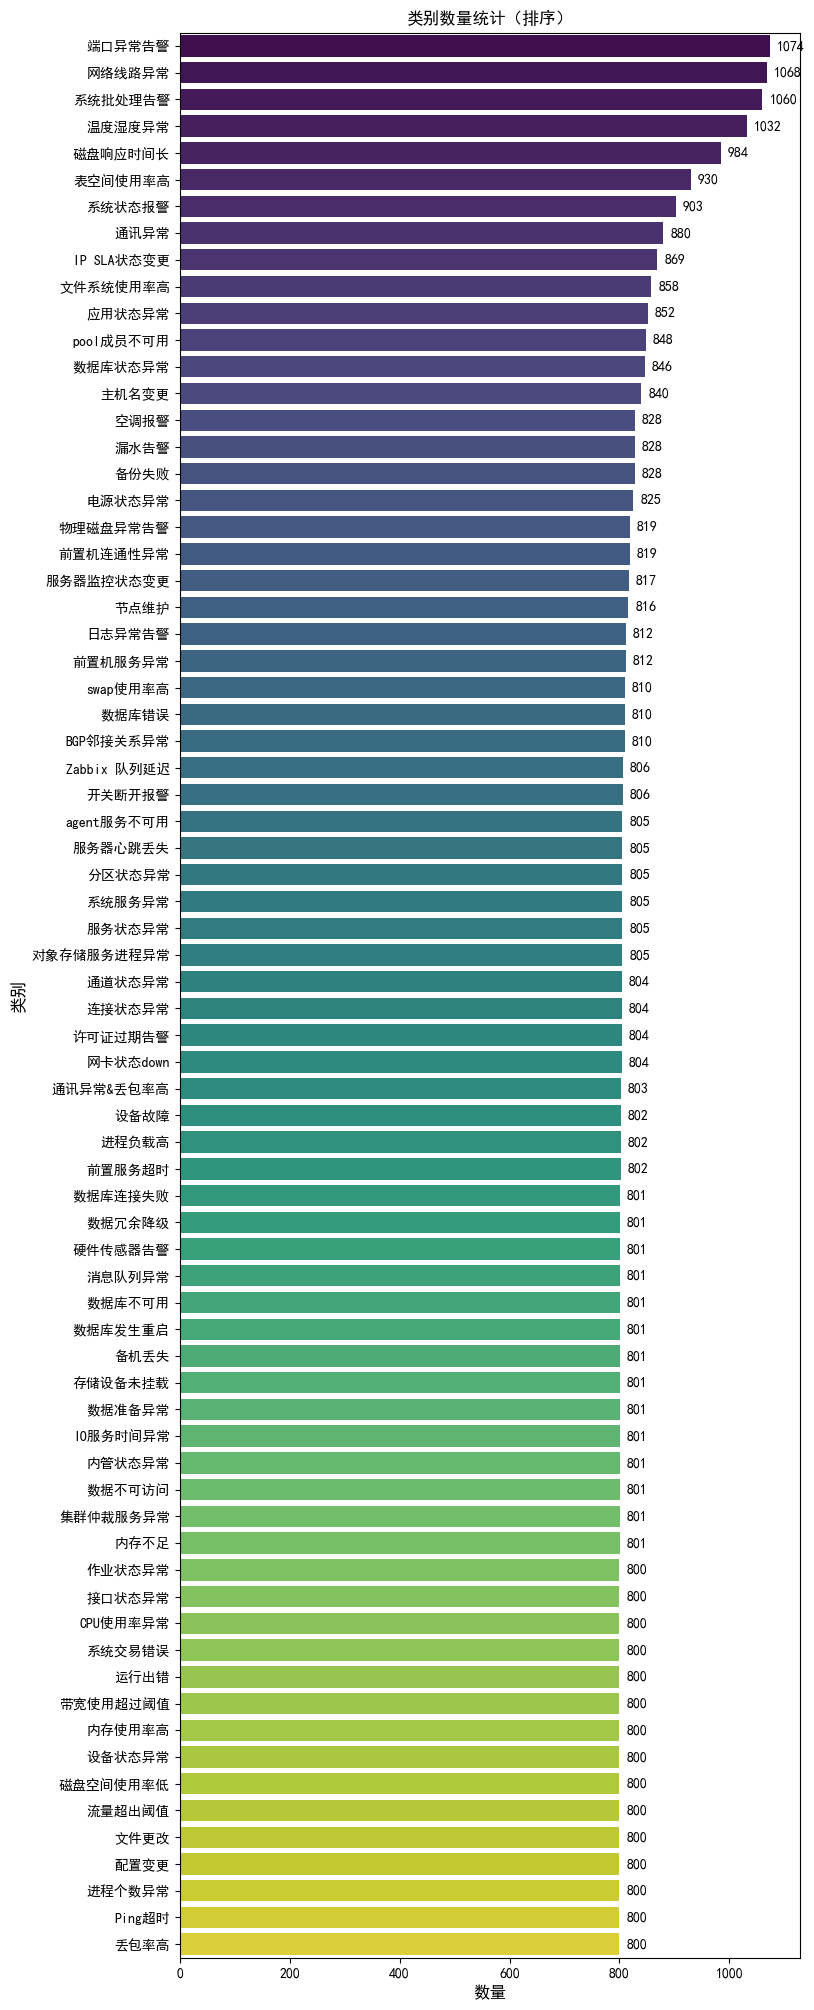

In [11]:
save_config(df)
seaborn_plot(width, height)
df.to_csv(save_path, index=False)

In [ ]:
# 耗时： 30分钟